In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import sys
from pathlib import Path

# import custom functions from src folder
module_path = str(Path.cwd() / "src")

if module_path not in sys.path:
    sys.path.append(module_path)

from robot import Robot

In [2]:
color = ["#e41a1c", "#4daf4a"]

In [3]:
myRobot = Robot(seed=24)
myRobot.vary_a1 = False
data = myRobot.simulate(5000, black_box=False)
valdata = myRobot.simulate(5000, black_box=False)

In [4]:
data

,color,x1,x2,a1,a2,r1,r2
0,red,10.165875,-5.737768,5.523416,1.244737,10.361182,3
1,red,-8.313172,-10.893792,3.850098,1.267038,12.503745,3
2,green,-0.736831,-7.679405,4.609960,3.124176,10.714041,3
3,red,14.840760,-2.497519,6.079409,0.186908,12.091364,3
4,green,5.459488,10.155468,0.898411,0.754240,9.159098,3
...,...,...,...,...,...,...,...
4995,red,7.269948,6.533450,0.452712,2.025342,10.712534,3
4996,green,-5.422939,6.463178,1.929177,1.927284,9.001641,3
4997,green,-9.489099,-0.951813,2.925565,1.726531,9.529833,3
4998,red,0.280289,8.096733,1.402873,2.774431,10.829741,3


<Axes: xlabel='x1', ylabel='x2'>

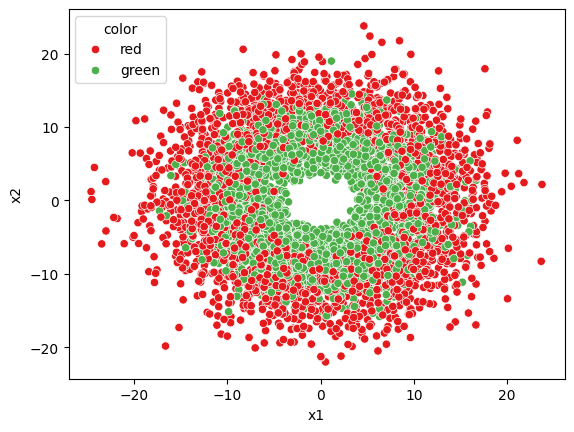

In [5]:
sn.scatterplot(data, x="x1", y="x2", hue="color", palette=color)

<Axes: xlabel='r1', ylabel='Count'>

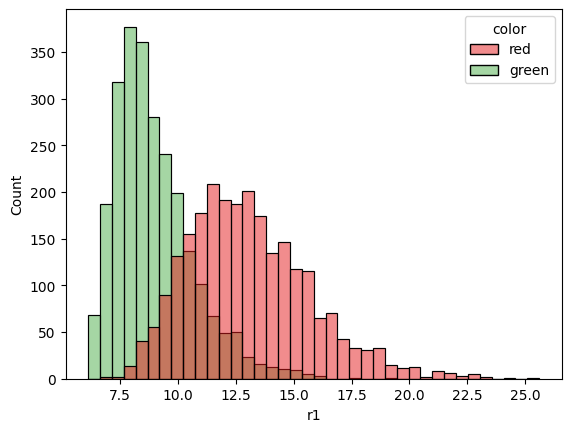

In [6]:
sn.histplot(data, x="r1", hue="color", palette=color)

<Axes: xlabel='a1', ylabel='Count'>

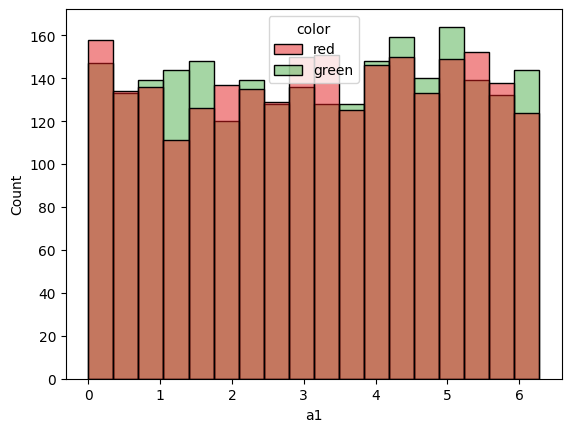

In [7]:
sn.histplot(data, x="a1", hue="color", palette=color)

<Axes: xlabel='x1', ylabel='Count'>

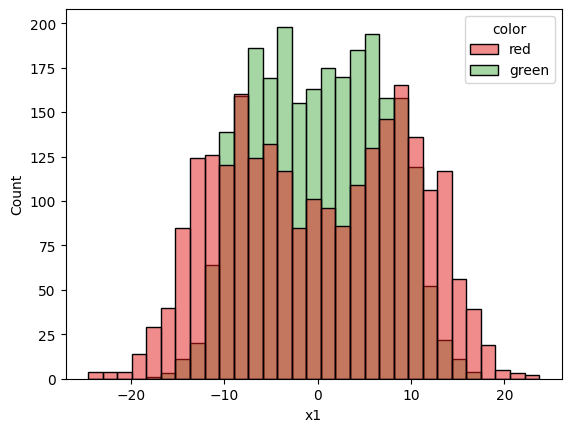

In [8]:
sn.histplot(data, x="x1", hue="color", palette=color)

<Axes: xlabel='x2', ylabel='Count'>

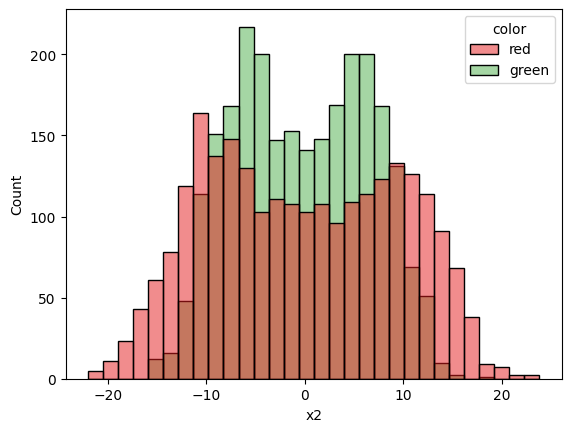

In [9]:
sn.histplot(data, x="x2", hue="color", palette=color)

<Axes: xlabel='x1', ylabel='x2'>

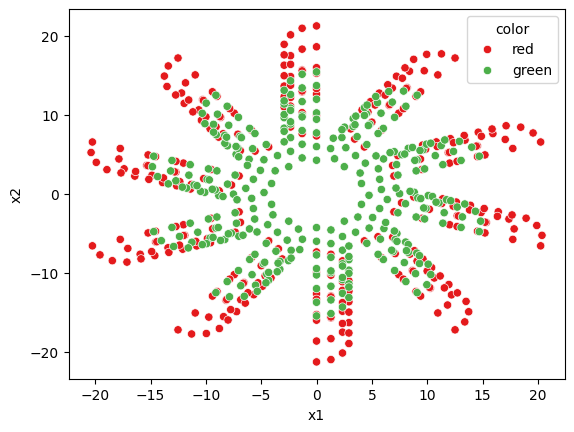

In [10]:
testdata = myRobot.gen_testdata(8, 10, black_box=False)
sn.scatterplot(testdata, x="x1", y="x2", hue="color", palette=color)

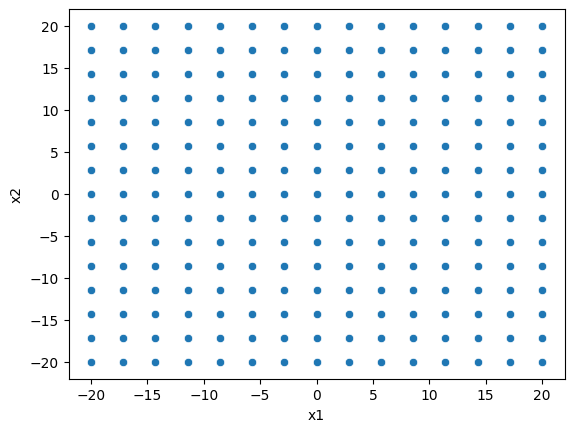

In [11]:
#Make grid for testing against analytical solution
nx = 15
x1 = np.linspace(-20, 20, nx)
x2 = np.linspace(-20, 20, nx)
xx1, xx2 = np.meshgrid(x1, x2)
grid_df = pd.DataFrame(columns = ["x1", "x2"], index = range(len(xx1.flatten())))
grid_df["x1"] = xx1.flatten()
grid_df["x2"] = xx2.flatten()
sn.scatterplot(grid_df, x="x1", y="x2")
grid_df.to_csv('data/x1_x2_grid.csv')

In [12]:
params = myRobot.get_parameters()
params

{'seed': 24, 'R2': 3, 'k_red': 7, 'k_green': 3, 'scale': 1, 'vary_a1': False}

In [13]:
# Save data
#data.to_csv(f'data/train_n_{len(data)}_kr{params["k_red"]}_kg{params["k_green"]}_s{params["scale"]}_vary_a1_{params["vary_a1"]}.csv', index=False)
#testdata.to_csv(f'data/test_n_{len(testdata)}_kr{params["k_red"]}_kg{params["k_green"]}_s{params["scale"]}_vary_a1_{params["vary_a1"]}.csv', index=False)
#valdata.to_csv(f'data/val_n_{len(data)}_kr{params["k_red"]}_kg{params["k_green"]}_s{params["scale"]}_vary_a1_{params["vary_a1"]}.csv', index=False)